<a href="https://colab.research.google.com/github/tjturnage/get-spc-meso-data/blob/main/get_spc_mesoanalysis_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size="+4" color="green"><b>Get SPC mesoanalysis data</b></font>  
<font size="+1" color="gray"><i>updated July 29, 2025</i></font>
<hr>
<font color="gray"><i>07/29/25 - Fixed bug so national sector isn't always being reverted to<br>
07/28/25 - Now reverts to national sector if mesosector not available for selected date/time</i></font>
<hr>
<hr>


<p>This Colab downloads previous <a href="https://www.spc.noaa.gov/exper/mesoanalysis/" target="_blank">SPC mesoanalysis graphics</a>. Use the map at this website to determine which zoomed in sector you'd like to obtain graphics for...</p>

<table>
<tr>
<td>11</td><td>Northwest</td>
<td>12</td><td>Southwest</td>
<td>13</td><td>Northern Plains</td>
<tr>
<td>14</td><td>Central Plains</td>
<td>15</td><td>Southern Plains</td>
<td>16</td><td>Northeast</td>
</tr>
<tr>
<td>17</td><td>East Central</td>
<td>18</td><td>Southeast</td>
<td>19</td><td>National</td>
</tr>
<tr>
<td>20</td><td>Midwest</td>
<td>21</td><td>Great Lakes</td>
<td></td><td></td>
</tr>
</table>
<br>
<p>After you've made your time, sector, and graphics types selections, proceed to the "Run the Code" cell and run it to commence the graphics file retrieval process. Once this has completed, click on the folder icon at the far left-hand side and you'll see something like this:</p>
<hr>

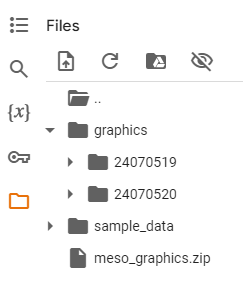

<hr>

<p>The graphics folder has subfolders corresponding to each hour of the mesoanalysis (in yymmdd format). All of these folders are combined into a "meso_graphics.zip" file that can then be downloaded to your computer.</p>

<p> Once you've unzipped this file on your computer, you'll have the same subfolders. Within each of those folders is a "viewer.html" file that you can open in your internet browswer. This will give you an easy way to quickly flip through the images corresponding to that hour.</p>

<hr>



In [11]:
# @title <font size="+3" color="green">Make your time and sector selections</font>
# @markdown <font size="+2" color="blue"><b><i>Enter the start time (in UTC) for the data</i></b></font>
start_date = "2025-07-23" # @param {type:"date"}
start_hour = "20" # @param ["00","01","02","03","04","05","06","07","08","09","10","11","12","13","14","15","16","17","18","19","20","21","22","23"]

start_datetime_str = f"{start_date}_{start_hour}"

# @markdown <font size="+2" color="blue"><b><i>Desired number of hours</i></b></font>
hours_duration = "2" # @param [1,2,3,4,5,6]

# @markdown <font size="+2" color="blue"><b><i>Sector ID (see table above)</i></b></font>
sector = "20" # @param ["11","12","13","14","15","16","17","18","19","20","21"]


In [9]:
# @title <font size="+3" color="green">Choose graphics types</font>
surface = True # @param {type:"boolean"}
upper_air = True # @param {type:"boolean"}
thermodynamics = True # @param {type:"boolean"}
wind_shear = True # @param {type:"boolean"}
composite_indices = True # @param {type:"boolean"}
multi_parameter_fields = True # @param {type:"boolean"}
beta = False # @param {type:"boolean"}
heavy_rain = False # @param {type:"boolean"}
winter_weather = False # @param {type:"boolean"}
fire_weather = False # @param {type:"boolean"}
classic = False # @param {type:"boolean"}

groups = [surface, upper_air, thermodynamics, wind_shear, composite_indices, multi_parameter_fields, beta, heavy_rain, winter_weather, fire_weather, classic]

sfc = [
['pmsl', 'Pressure and Wind'], ['ttd', 'Temp/Wind/Dwpt'],
['thet', 'MSL Press/Theta-e/Wind'], ['mcon', 'Moisture Convergence'], ['thea', 'Theta-E Advection'],
['mxth', 'Mixing Ratio / Theta'], ['icon', 'Inst Contraction Rate'], ['trap', 'Fluid Trapping'],
['vtm', 'Velocity Tensor Mag'], ['dvvr', 'Sfc Div and Vort'],
['def', 'Deformation / Axis of Dilitation'],['pchg', '2hr Press Change'],
['temp_chg', '3hr Temp Change'], ['dwpt_chg', '3hr Dewpoint Change'],
['mixr_chg', '3hr 100mb MixR Change'], ['thte_chg', '3hr Thetae Change'], ['bigsfc', 'Surface Plot']]

ua =[['925mb', '925mb Analysis'], ['850mb2', '850mb Analysis'],
['850mb', '850mb Analysis v2'], ['700mb', '700mb Analysis'], ['500mb', '500mb Analysis'],
['300mb', '300mb Analysis'], ['dlcp', 'Deep Moist Conv'], ['tadv_925', '925mb Temp Adv'],
['tadv', '850mb Temp Adv'], ['7tad', '700mb Temp Adv'], ['sfnt', 'Surface FGEN'],
['9fnt', '925mb FGEN'], ['8fnt', '850mb FGEN'], ['7fnt', '700mb FGEN'], ['epvl', '850 fgen & EPV'],
['epvm', '700 fgen & EPV'], ['98ft', '925-850mb FGEN'], ['857f', '850-700mb FGEN'],
['75ft', '700-500mb FGEN'], ['vadv', '700-400mb Diff PVA'], ['padv', '400-250mb Pot Vort Adv'],
['ddiv', '850-250mb Diff Div'], ['ageo', '300mb Jet Circ'], ['500mb_chg', '12hr H5 chg'],
['trap_500', 'Fluid Trapping (H500)'], ['trap_250', 'Fluid Trapping (H250)']]

thermo = [['sbcp', 'SBCAPE'], ['mlcp', 'MLCAPE'], ['mucp', 'MUCAPE'],
['eltm', 'EL Temp/MUCAPE/MUCIN'], ['ncap', 'CAPE - Normalized'], ['dcape', 'CAPE - Downdraft'],
['muli', 'Sfc Based LI'], ['laps', 'Mid-Level Lapse Rates'], ['lllr', 'Low-Level Lapse Rates'],
['maxlr', 'Max 2-6 km AGL Lapse Rate'], ['lclh', 'LCL hght'], ['lfch', 'LFC hght'],
['lfrh', 'LCL-LFC RH'], ['sbcp_chg', '3-hour SBCAPE Change'], ['sbcn_chg', '3-hour SBCIN Change'],
['mlcp_chg', '3-hour MLCAPE Change'], ['mucp_chg', '3-hour MUCAPE Change'],
['lllr_chg', '3-hour Low LR Change'], ['laps_chg', '6-hour Mid LR Change'],
['skewt', 'Skew-T Maps']]

wshr = [['eshr', 'Bulk Shear - Effective'], ['shr6', 'Bulk Shear - Sfc-6km'],
['shr8', 'Bulk Shear - Sfc-8km'], ['shr3', 'Bulk Shear - Sfc-3km'],
['shr1', 'Bulk Shear - Sfc-1km'],['brns', 'BRN Shear'], ['effh', 'SR Helicity - Effective'],
['srh3', 'SR Helicity - Sfc-3km'], ['srh1', 'SR Helicity - Sfc-1km'],
['srh5', 'SR Helicity - Sfc-500m'], ['llsr', 'SR Wind - Sfc-2km'], ['mlsr', 'SR Wind - 4-6km'],
['ulsr', 'SR Wind - 9-11km'], ['alsr', 'SR Wind - Anvil Level'], ['mnwd', '850-300mb Mean Wind'],
['xover', '850 and 500mb Winds'], ['srh3_chg', '3hr Sfc-3km SR Helicity Change'],
['shr1_chg', '3hr Sfc-1km Bulk Shear Change'], ['shr6_chg', '3hr Sfc-6km Bulk Shear Change'],
['hodo', 'Hodograph Map']]

comp = [['scp', 'Supercell Composite'], ['stor', 'Sig Tor (fixed)'],
['stpc', 'Sig Tor (eff)'], ['stpc5', 'Sig Tor (0-500m SRH)'], ['sigt1', 'Cond Prob SigTor 1'],
['sigt2', 'Cond Prob SigTor 2'], ['nstp', 'Non-Supercell Tor'], ['vtp3', 'Violent Tor Parm'],
['sigh', 'Significant Hail'], ['sars1', 'SARS Hail Size'], ['sars2', 'SARS Hail %age'],
['lghl', 'Large Hail Parm'], ['dcp', 'Derecho Comp'], ['cbsig', 'Craven/Brooks SigSvr'],
['brn', 'Bulk Ri Number'], ['mcsm', 'MCS Maint'], ['mbcp', 'Microburst Composite'],
['desp', 'Enh Stretch Pot'], ['ehi1', 'EHI - Sfc-1km'], ['ehi3', 'EHI - Sfc-3km'],
['vgp3', 'VGP - Sfc-3km'], ['crit', 'Critical Angle']]

multi = [['mlcp_eshr', 'MLCAPE / Eff Shear'],['cpsh', 'MUCAPE / Eff Shear'],
['comp', 'MU LI / H8 & H5 Wind'], ['lcls', 'LCL Hgt / 0-1 SRH'],
['lr3c', '0-3km Lapse Rate/MLCAPE'], ['3cape_shr3', '0-3km Bulk Shear/MLCAPE'],
['3cvr', 'Sfc Vort / 0-3km MLCAPE'], ['tdlr', 'Sfc Dwpt / H7-H5 LapseR'],
['qlcs1', '0-3km ThetaE diff/Shear Vec & MUCAPE'],
['qlcs2', '', '0-3km ThetaE diff/Shear Vec & MLCAPE']]

heavy = [['pwtr', 'PWAT'], ['tran_925', '925 Moist Trans'], ['tran', '850 Moist Trans'],
['tran_925-850', '925-850 Mtrans'],['prop', 'Propagation Vec'], ['peff', 'Pcpn Potential'],
['mixr', '100mb Mean Mixing Ratio']]

winter = [['ptyp', 'Precipitation Type'], ['epvl', '800-750mb EPVg'],
['epvm', '650-500mb EPVg'],['les1', 'Lake Effect Snow 1'],['les2', 'Lake Effect Snow 2'],
['snsq', 'Snow Squall Parameter'],
['dend', 'Dendritic Growth Layer Depth'], ['dendrh', 'Dendritic Growth Layer RH']]

fire = [ ['sfir', 'Sfc RH / T / Wind'], ['fosb', 'Fosberg Index'],
['lhan', 'Low Haines Index'],['mhan', 'Mid Haines Index'],['hhan', 'High Haines Index'],
['lasi', 'Lower Atmos Severity Index']]

oldies = [['ttot', 'Total Totals'], ['show', 'Showalter Index'], ['kidx', 'K Index']]

newies = [['sherbe', 'SHERBE'], ['moshe', 'Modified SHERBE'], ['cwasp', 'CWASP'],
['tehi', 'Tornadic 0-1 km EHI'], ['tts', 'Tornadic Tilting and Stretching parameter (TTS)'],
['ptstpe', 'Conditional probability of EF0+ tornadoes'],
['pstpe', 'Conditional probability of EF2+ tornadoes'], ['pvstpe', 'Conditional probability of EF4+ tornadoes']]

group_list = []
lists = [sfc, ua, thermo, wshr, comp, multi, newies,
         heavy, winter, fire, oldies]

for g,l in zip(groups,lists):
    if g:
      group_list.append(l)

In [12]:
# @title <font size="+3" color="green">Run the code</font>
from datetime import datetime,timedelta
import urllib.request
import os
import shutil
import sys

BASEDIR = '/content/graphics'
if not os.path.exists(BASEDIR):
    os.mkdir(BASEDIR)

viewer_url = "https://raw.githubusercontent.com/tjturnage/Meteorological-Case-Study-Tools/main/spc_meso_graphics_viewer.html"

url_prefix_dict = {'event': 'https://www.spc.noaa.gov/exper/mesoanalysis/archive/',
                   'current': 'https://www.spc.noaa.gov/exper/mesoanalysis/',
                   'archive': 'https://www.spc.noaa.gov/exper/ma_archive/images_s4/'}

class GetMesoImages:
    """
    start_date_hour
            string: Date and Hour to start grabbing images -- yyyymmdd_hh
    total_hours
            int: number of hours from startingDateHour to grab images
    sector
            2 digit string (not integer) representing SPC meso sector to download
                11:NW       12:SW           13:N Plns
                14:C Plns   15:S Plns       16:NE
                17:EC       18:SE           19:National
                20:MW       21:Great Lakes
    parm_groups
            list of lists of strings. options are:
                [surface, upper_air, thermodynamics, wind_shear, composite_indices,
                multi_parameter_fields, heavy_rain, winter_weather, fire_weather, classic, beta]
    url_prefix_type
            string: 'event', 'current', or 'archive'
    """
    def __init__(self,start_date_hour,total_hours,sector,parm_groups,url_prefix_type):
        """
        initialize instance
        """
        self.start_date_hour = start_date_hour
        self.total_hours = int(total_hours) - 1
        self.sector_name = 's' + sector
        self.parm_groups = parm_groups
        self.url_prefix_type = url_prefix_type
        self.url_prefix = url_prefix_dict[self.url_prefix_type]
        self.date_hour_list = self.make_date_hour_list()
        self.make_folders()
        self.graphics_list = self.make_graphics_list()
        self.check_if_images_exist()
        self.download_and_store_images()
        self.zip_files()


    def zip_files(self) -> None:
        """
        creates a zip file of all graphics
        """
        shutil.make_archive(f'meso_graphics', 'zip', '/content/graphics')


    def make_date_hour_list(self) -> list:
        """
        use datetime to create list of strings representing date and hour
        """
        date_hour_list = []
        starting_datehour = datetime.strptime(self.start_date_hour,"%Y-%m-%d_%H")
        ending_datehour = starting_datehour + timedelta(hours=self.total_hours)
        while starting_datehour <= ending_datehour:
            dt_str = datetime.strftime(starting_datehour,'%y%m%d%H')
            date_hour_list.append(dt_str)
            starting_datehour = starting_datehour + timedelta(hours=1)
        return date_hour_list

    def make_folders(self) -> None:
        """
        Resets /content/graphics folder
        Creates /content/graphics/YYMMDDHH subfolders for each hour
        """
        os.system(f'rm -rf /content/graphics/')
        os.system(f'mkdir /content/graphics/')
        for date_hour in self.date_hour_list:
            os.system(f'mkdir /content/graphics/{date_hour}')

    def make_graphics_list(self) -> list:
        """
        aggregates lists of products based on category into single list
        """
        graphics_list = []
        for group in self.parm_groups:
            for element in group:
                graphics_list.append(element[0])
        return graphics_list

    def download_this_file(self,url,destination) -> None:
        try:
            opener = urllib.request.build_opener()
            opener.addheaders = [('User-agent', 'Mozilla/5.0')]
            urllib.request.install_opener(opener)
            urllib.request.urlretrieve(url,destination)
        except:
            pass

    def change_url_prefix(self,e,filename) -> None:
        print(f'HTTP Error downloading {filename}: {e} - {e}')
        print("Changing to national sector, since that's all that's available")
        self.url_prefix_type = 'archive'
        self.url_prefix = url_prefix_dict[self.url_prefix_type]

    def check_if_images_exist(self) -> None:
        """
        check to see if an image is available to download
        The pmsl product is the test product to see if images are available
        """
        date_hour = self.date_hour_list[0]
        hour_dir = os.path.join(BASEDIR,date_hour)
        graphic = 'pmsl'
        source_filename = f'{graphic}_{date_hour}.gif'
        dest_filename = f'{graphic}.gif'
        full_url = f'{self.url_prefix}{self.sector_name}/{graphic}/{source_filename}'
        destination_filepath = os.path.join(hour_dir,dest_filename)

        try:
            opener = urllib.request.build_opener()
            opener.addheaders = [('User-agent', 'Mozilla/5.0')]
            urllib.request.install_opener(opener)
            urllib.request.urlretrieve(full_url, destination_filepath)
            #print(f'Downloaded: {filename}')
        except urllib.error.HTTPError as e:
            self.change_url_prefix(e, source_filename)
        except urllib.error.URLError as e:
            self.change_url_prefix(e, source_filename)
        except Exception as e:
            self.change_url_prefix(e, source_filename)

    def download_and_store_images(self) -> None:
        """
        download and store images
        Returns nothing
        """
        for date_hour in self.date_hour_list:

            # create an image directory for each hour being downloaded
            hour_dir = os.path.join(BASEDIR,date_hour)
            #print(hour_dir)
            try:
                if not os.path.exists(hour_dir):
                    os.mkdir(hour_dir)
            except ValueError:
                print(f'Can not make {hour_dir}')
            # stage html viewer in each hour subdir
            try:
                self.download_this_file(viewer_url,os.path.join(hour_dir,'viewer.html'))
            except Exception as e:
                print(f'Error downloading viewer.html: {e}')

            # loop through graphics and valid times
            for i,g in enumerate(self.graphics_list):
                graphic = self.graphics_list[i]
                if self.url_prefix_type == 'current':
                    #Example: https://www.spc.noaa.gov/exper/mesoanalysis/s16/pmsl/pmsl_22102521.gif
                    source_filename = f'{graphic}_{date_hour}.gif'
                    full_url = f'{self.url_prefix}{self.sector_name}/{graphic}/{source_filename}'
                else:
                    #Example: https://www.spc.noaa.gov/exper/ma_archive/images_s4/20050622/18_pmsl.gif
                    source_filename = f'{date_hour[-2:]}_{graphic}.gif'
                    full_url = f'{self.url_prefix}20{date_hour[:-2]}/{source_filename}'
                    #print(full_url)

                dest_filename = f'{graphic}.gif'
                # all downloaded files will be renamed to remove date and hour to standardize names
                destination_filepath = os.path.join(hour_dir,dest_filename)
                self.download_this_file(full_url,destination_filepath)

# --------------------------------------------------------------------------------------
# Instantiate class
# --------------------------------------------------------------------------------------
if __name__ == '__main__':
    GetMesoImages(start_datetime_str,hours_duration,sector,group_list,'current')


In [ ]:
# @title <font size="+2" color="orange"><i>Ignore this cell for now - working on removing transparency from images</i></font>

#!pip install PIL
import os
from PIL import Image

# Absolute path to this script
scriptdir = '.'
images = os.path.join(scriptdir, 'graphics')

def remove_transparency_and_add_white_background(image_path, output_path):
    """
    Removes transparency from an image and adds a white background.

    Args:
        image_path (str): The path to the input image.
        output_path (str): The path to save the output image.
    """
    try:
        image = Image.open(image_path)

        # Check if the image has an alpha channel or is in 'P' mode with transparency
        if image.mode in ('RGBA', 'LA') or (image.mode == 'P' and 'transparency' in image.info):
            # Create a white background image
            bg = Image.new('RGB', image.size, (255, 255, 255))

            # Paste the image onto the background. If the image has an alpha channel,
            # use the alpha channel as a mask for transparency.
            try:
                bg.paste(image, (0, 0), image)
            except ValueError:
                # Handle cases where image mode is P but has transparency without a proper alpha channel
                bg.paste(image, (0, 0))

            # Save the result
            bg.save(output_path)
            print(f"Processed image saved to: {output_path}")
        else:
            # If no transparency, just copy the image
            image.convert('RGB').save(output_path)
            print(f"No transparency found, image copied to: {output_path}")

    except FileNotFoundError:
        print(f"Error: Input file not found at {image_path}")
    except Exception as e:
        print(f"An error occurred while processing {image_path}: {e}")


# Walk through directory
for root, subfolders, files in os.walk(images):
    for filename in files:
        print(filename)
        try:
            image = Image.open(os.path.join(scriptdir, root, filename))
            # If image has an alpha channel
            print(image.mode)
            if image.mode == 'P':
                print("alpha!")
                # Create a blank background image
                bg = Image.new('RGB', image.size, (255, 255, 255))
                # Paste image to background image
                bg.paste(image, (0, 0), image)
                # Save pasted image as image
                bg.save(os.path.join('/content/graphics', filename), "PNG")

        except:
            pass




# Example usage (you would loop through your downloaded images):
# input_image_path = 'downloaded_images/240730/pmsl_24073019.gif' # Replace with your image path
# output_image_path = 'processed_images/pmsl_24073019_no_transparency.png' # Replace with your desired output path
# os.makedirs(os.path.dirname(output_image_path), exist_ok=True) # Create output directory if it doesn't exist
# remove_transparency_and_add_white_background(input_image_path, output_image_path)